## Loading Libraries

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing, metrics  
import math
from keras import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb

## Importing data

In [4]:
data = pd.read_csv('./tmp/nike.csv', index_col=False)
data.head()

,Unnamed: 0,Date,Open,High,Low,Close,high_low,open_close,mvavgo7,mvavgc7,mvavgo14,mvavgc14,mvavgo21,mvavgc21,sd7o,sd7c
0,20,1987-09-17,0.27774,0.28231,0.27093,0.27327,0.01138,0.00447,0.268943,0.272576,0.258439,0.259604,0.255266,0.256479,0.011800,0.003432
1,21,1987-09-18,0.27327,0.27774,0.27327,0.27558,0.00447,-0.00231,0.273214,0.273570,0.259923,0.261253,0.256582,0.258012,0.003476,0.003085
2,22,1987-09-21,0.27558,0.27774,0.25722,0.26627,0.02052,0.00931,0.273879,0.271931,0.261572,0.261899,0.258116,0.258995,0.003411,0.003517
3,23,1987-09-22,0.26627,0.27992,0.26627,0.27992,0.01365,-0.01365,0.272240,0.272881,0.262219,0.264021,0.258990,0.260628,0.003958,0.004654
4,24,1987-09-23,0.27992,0.29611,0.27992,0.29162,0.01619,-0.01170,0.273190,0.275837,0.264340,0.267634,0.260730,0.262926,0.004926,0.008328


## Selecting input and output features

In [5]:
X = data[['Open', 'High', 'Low', 'high_low', 'open_close', 'mvavgo7', 'mvavgc7', 'mvavgo14', 'mvavgc14', 'mvavgo21', 'mvavgc21', 'sd7o', 'sd7c']]
X.head()

,Open,High,Low,high_low,open_close,mvavgo7,mvavgc7,mvavgo14,mvavgc14,mvavgo21,mvavgc21,sd7o,sd7c
0,0.27774,0.28231,0.27093,0.01138,0.00447,0.268943,0.272576,0.258439,0.259604,0.255266,0.256479,0.011800,0.003432
1,0.27327,0.27774,0.27327,0.00447,-0.00231,0.273214,0.273570,0.259923,0.261253,0.256582,0.258012,0.003476,0.003085
2,0.27558,0.27774,0.25722,0.02052,0.00931,0.273879,0.271931,0.261572,0.261899,0.258116,0.258995,0.003411,0.003517
3,0.26627,0.27992,0.26627,0.01365,-0.01365,0.272240,0.272881,0.262219,0.264021,0.258990,0.260628,0.003958,0.004654
4,0.27992,0.29611,0.27992,0.01619,-0.01170,0.273190,0.275837,0.264340,0.267634,0.260730,0.262926,0.004926,0.008328


In [6]:
Y = data[['Close']]
Y.head()

,Close
0,0.27327
1,0.27558
2,0.26627
3,0.27992
4,0.29162


## Train-test split

In [7]:
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, shuffle=False)

## Building model

In [10]:
xgbr1 = xgb.XGBRegressor()
xgbr1.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [14]:
import sklearn.metrics as metrics

# Obtaining predictions for Model 1
P = xgbr1.predict(X_test)

# Accuracy evaluation
A1 = sklearn.metrics.mean_absolute_error(y_test, P)           # Best possibe result would be 0.0
print("Accuracy is:", A1)

np.set_printoptions(suppress=True)

# Printing results
print("Predictions:")
print(P[0:10])
print("Expected values:")
print(y_test[0:10])

Accuracy is: 19.93223472584172
Predictions:
[22.13433  22.137188 21.862677 22.131575 22.109327 22.045574 21.792376
 22.07939  21.785418 21.861916]
Expected values:
       Close
6080  22.455
6081  22.362
6082  21.789
6083  22.034
6084  22.204
6085  21.903
6086  21.771
6087  22.146
6088  21.435
6089  21.798


<Figure size 2160x1440 with 0 Axes>

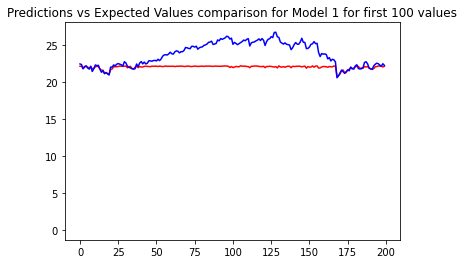

<Figure size 2160x1440 with 0 Axes>

In [20]:
L = range(200)
ylabels = []
for i in range(0,math.ceil(np.amax(y_test)+3),5):
    ylabels.append(i)
plt.yticks(ylabels,ylabels)
plt.plot(L, P[0:200], 'r', "Predictions")
plt.plot(L, y_test[0:200], 'b', "Expected Values")
plt.title('Predictions vs Expected Values comparison for Model 1 for first 100 values')
plt.figure(figsize=(30,20))